# Paso a paso de la simulación con método Monte Carlo para el ejercicio planteado

### Paso 1
Importamos las paqueterías que necesitamos.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import ticker
import scipy.stats as st

### Paso 2
Importamos el _data frame_ del archivo CSV.

In [2]:
df = pd.read_excel('Prices.xlsx')

### Paso 3
Generamos una variable que indica la cantidad de simulaciones, los factores de descuento y la probabilidad de que el cliente pague el precio completo o con descuento por tarjeta oro y plata.
- Llamaremos full_price aquellos precios que se pagan sin descuento.
- Los silver_price son los equipos con 5% de descuento, por lo que se multiplicarán por el factor 0.95.
- Los gold_price son equipos con 10% de descuento, por lo que se multiplicarán por el factor 0.9.
- La probabilidad de que el cliente pague sin descuento (`prob_fp`) es del 70% (o sea 0.7).
- La probabilidad de que el cliente pague con tarjeta plata (`prob_sp`) es del 20% (o sea 0.2).
- La probabilidad de que el cliente pague con tarjeta oro (`prob_fp`) es del 10% (o sea 0.1).

In [3]:
simulations = 200 #Número de simulaciones.
silver_price = 0.95 #Factor para que sea 5% de descuento.
gold_price = 0.9 #Factor para que sea 10% de descuento.
prob_fp = 0.7 #Probabilidad de que cliente pague sin descuento.
prob_sp = 0.2 #Probabilidad de que cliente pague con 5% de descuento.
prob_gp = 0.1 #Probabilidad de que cliente pague con 10% de descuento.

### Paso 4
Generaremos tres _dataframes_, uno para `full_price`, otro para `silver_price` y un último de `gold_price`.

In [4]:
df_fullprice = df.copy()
df_fullprice['Type'] = np.repeat('full_price', len(df_fullprice))

In [5]:
df_silverprice = df.copy()
df_silverprice['Type'] = np.repeat('silver_price', len(df_silverprice))

In [6]:
df_goldprice = df.copy()
df_goldprice['Type'] = np.repeat('gold_price', len(df_goldprice))

### Paso 5
Modificamos los tres _dataframes_, los precios para los _silver prices_ y los _golden prices_ se multiplican por su respectivo factor.
Las probabilidades de que cada modelo sea vendido de los tres dataframes se multiplican por su respectiva probabilidad de que sea un cliente que pague _full price_ (0.7), _silver price_ (0.2) y _gold price_ (0.1).

In [7]:
df_fullprice['Probability'] = df_fullprice['Probability'] * prob_fp

df_silverprice['Price'] = df_silverprice['Price'] * silver_price
df_silverprice['Probability'] = df_silverprice['Probability'] * prob_sp

df_goldprice['Price'] = df_goldprice['Price'] * gold_price
df_goldprice['Probability'] = df_goldprice['Probability'] * prob_gp

### Paso 6
Juntamos los tres _data frames_ en uno.

In [8]:
df1 = pd.concat([df_fullprice, df_silverprice, df_goldprice])
df1.index = range(0, len(df1))
df1.reset_index()

,index,Item,Price,Cost,Probability,Type
0,0,Item #1,4600.0,4830.0,0.01953,full_price
1,1,Item #2,4100.0,4080.0,0.03290,full_price
2,2,Item #3,2500.0,1575.0,0.05782,full_price
3,3,Item #4,4400.0,4004.0,0.04046,full_price
4,4,Item #5,5000.0,3600.0,0.06797,full_price
5,5,Item #6,5000.0,5350.0,0.04620,full_price
6,6,Item #7,2700.0,1998.0,0.04991,full_price
7,7,Item #8,2200.0,2068.0,0.00273,full_price
8,8,Item #9,2600.0,2288.0,0.04158,full_price
9,9,Item #10,2800.0,3080.0,0.01736,full_price


### Paso 7
Creamos una nueva columna que nos dirá el margen ($precio - costo$).

In [9]:
df1['Margin'] = df1['Price'] - df1['Cost']

### Paso 8
Creamos dos _data frames_ vacíos, uno de `totales` que contendrá los resultados de cada simulación (para _Revenue_, _Cost_ y _Magin_), en nuestro ejemplo con la cantidad indicada en la variable `simulations`.
Crearemos un segund _data frame_ llamado `subtotales` la cual, para cada simulación sumará los equipos recibidos que como se indicó anteriormente tendrá un comportamiento variable de $X \sim N(\mu = 1000, \sigma = 100)$, sólo para cuestiones de control dejaremos que la lista sean sólo ceros ($0$) repetido 2000 veces.
La lista `subtotales` deberá resetearse cada vez que se genere una nueva simulación, caso contrario para `totales` el cual anotará los valores acumulados.

In [10]:
totales = pd.DataFrame({'Revenue': np.zeros(simulations),
    'Cost': np.zeros(simulations),
    'Margin': np.zeros(simulations),
    'Volume': np.zeros(simulations)})

subtotales = pd.DataFrame({'Revenue': np.zeros(2000),
    'Cost': np.zeros(2000),
    'Margin': np.zeros(2000)})

qty = 0

### Paso 9
Esta es la parte central de l simulación. Se harán dos búcles, uno anidado en otro.
El búcle exterior se enecargará de hacer las siguientes taareas:
- Genera una semilla, esto para que cada vez que corramos el programa nos dé los mismo resultados pero siga usando valores semialeatorios.
- Hacer la variable `qty` que indicará cuántos productos fueron vendidos (recordemos que lo hará con una distribución normal $X \sim N(\mu= 1000, \sigma= 100)$).
- Todo lo contenido en el _data set_ `subtotales` se vaciará dejando valores 0 en las tres columnas.
- **Anida el segundo bucle**.
- Sumará los valores en cada una de las columnas del _data set_ `subtotales` que ya no sólo contienen ceros (0), ya que fueron llenados con el segundo bucle del paso anterior y colocará esos resultados en la fila correspondiente de su simulación en el _data set_ `totales`.
- Adicionalmente se agregará la cantidad de piezas simuladas en la fila correspondiente del _data set_ `totales`.

El búcle interior realiza lo siguiente:
- Genera una semilla, esto para que cada vez que corramos el programa nos dé los mismo resultados pero siga usando valores semialeatorios.
- Genera una variable llamada `model` el cual seleccionará el índice de forma totalmente aleatoria del _data frame_ que contiene todos los posibles resultados (obtenido en el paso 7), la probabilidad de que un índice sea seleccionado se da por la columna `Probability`.
- Una vez teniendo el índice busca en el mismo _data set_ que precio tiene ese modelo, su costo y el margen. Los resultados serán colocados en el _data set_ `subtotales` en la fila correspondinete a su simulación.

In [11]:
for i in range (0, simulations):
    random.seed(i*10)
    qty = int(round(np.random.normal(loc=1000, scale=100), ndigits= None))
    subtotales['Revenue'] = np.zeros(2000)
    subtotales['Cost'] = np.zeros(2000)
    subtotales['Margin'] = np.zeros(2000)
    for j in range(0, qty):
        random.seed(j*i)
        model = np.random.choice(df1.index, 1, p = df1['Probability'])
        subtotales['Revenue'].loc[j] = float(df1['Price'].loc[model])
        subtotales['Cost'].loc[j] = float(df1['Cost'].loc[model])
        subtotales['Margin'].loc[j] = float(df1['Margin'].loc[model])
    totales['Revenue'].loc[i] = sum(subtotales['Revenue'])
    totales['Cost'].loc[i] = sum(subtotales['Cost'])
    totales['Margin'].loc[i] = sum(subtotales['Margin'])
    totales['Volume'].loc[i] = qty

### Paso 10
Podemos ver el resultado estadístico de cada una de las columnas. Como lo índica `count` son la cantidad que definimos en `simulations` en el paso 3.

In [12]:
totales.describe().astype(int)

,Revenue,Cost,Margin,Volume
count,200,200,200,200
mean,3627224,3271229,355995,1000
std,348930,317552,35017,96
min,2776960,2506646,270314,767
25%,3394261,3067201,333321,937
50%,3608312,3254833,357096,997
75%,3864131,3471480,380254,1060
max,4577485,4131135,446350,1258


### Paso 11
Podemos graficar los resultados de cada una de las simulaciones para ver el comportamiento.
Para cada uno de los gráficos he indicado con una línea vertical el promedio.
En la segunda serie de gráficas señalo el histograma para evaluar donde recaen los datos, la escala se ha mantenido igual para observar los valores reales.

Text(0.5, 0, 'Number of simulation')

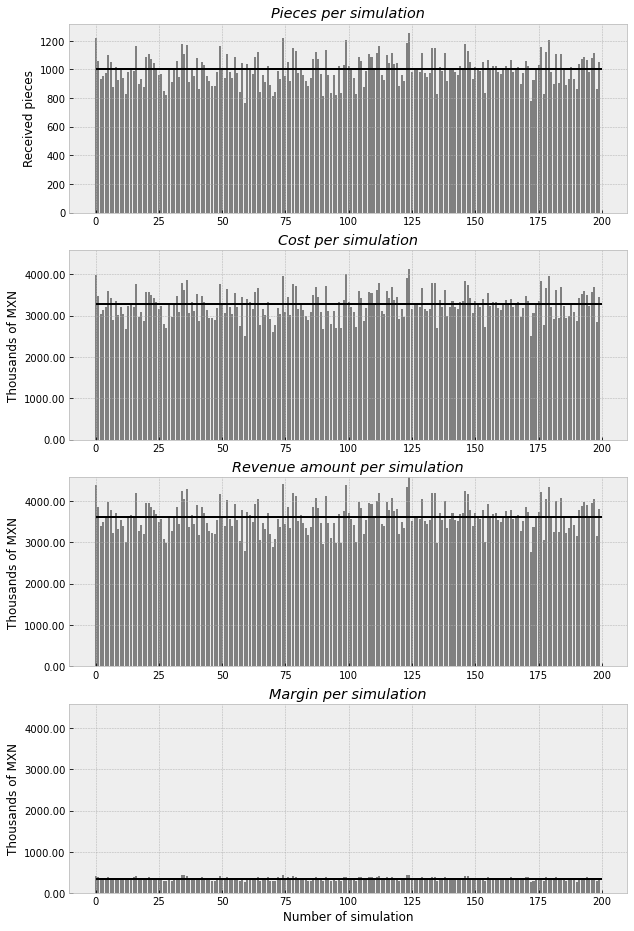

In [13]:
#Gráfico de los resultados
q_min = min(totales['Margin'])
q_max = max(totales['Revenue'])
plt.style.use('bmh')
fig1 = plt.figure(figsize=(10*1, 4*4))
ax1 = plt.subplot(411)
ax1.bar(list(totales.index),totales['Volume'], color= 'gray')
ax1.hlines(totales['Volume'].mean(), xmax=simulations, xmin=0, 
           color='black', label='Average')
ax1.set_title("Pieces per simulation", fontstyle='italic')
ax1.set_ylabel('Received pieces')
ax2 = plt.subplot(412)
ax2.hlines(totales['Cost'].mean(), xmax=simulations, xmin=0, 
           color='black', label='Average')
ax2.bar(list(totales.index),totales['Cost'], color= 'gray')
ax2.set_title("Cost per simulation", fontstyle='italic')
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(x/1000, '.2f')))
ax2.set_ylabel('Thousands of MXN')
ax2.set_ylim(0, q_max)
ax3 = plt.subplot(413)
ax3.hlines(totales['Revenue'].mean(), xmax=simulations, xmin=0, 
           color='black', label='Average')
ax3.bar(list(totales.index),totales['Revenue'], color= 'gray')
ax3.set_title("Revenue amount per simulation", fontstyle='italic')
ax3.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(x/1000, '.2f')))
ax3.set_ylabel('Thousands of MXN')
ax3.set_ylim(0, q_max)
ax4 = plt.subplot(414)
ax4.hlines(totales['Margin'].mean(), xmax=simulations, xmin=0, 
           color='black', label='Average')
ax4.bar(list(totales.index),totales['Margin'], color= 'gray')
ax4.set_title("Margin per simulation", fontstyle='italic')
ax4.set_ylim(0, q_max)
ax4.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(x/1000, '.2f')))
ax4.set_ylabel('Thousands of MXN')
ax4.set_xlabel('Number of simulation')

(270314.0, 4577485.0)

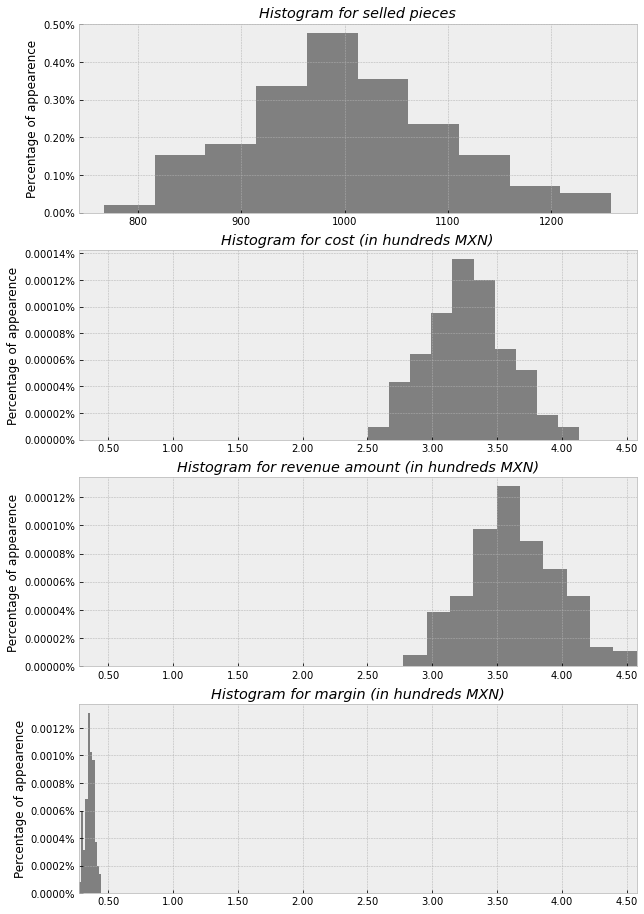

In [14]:
fig2 = plt.figure(figsize=(10*1, 4*4))
ax5 = plt.subplot(411)
ax5.hist(totales['Volume'], density=True, color='gray')
ax5.set_title('Histogram for selled pieces', fontstyle='italic')
ax5.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(x, '.2%')))
ax5.set_ylabel('Percentage of appearence')
ax6 = plt.subplot(412)
ax6.hist(totales['Cost'], density=True, color='gray')
ax6.set_title('Histogram for cost (in hundreds MXN)', fontstyle='italic')
ax6.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(x, '.5%')))
ax6.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(x/1000000, '.2f')))
ax6.set_ylabel('Percentage of appearence')
ax6.set_xlim(q_min, q_max)
ax7 = plt.subplot(413)
ax7.hist(totales['Revenue'], density=True, color='gray')
ax7.set_title('Histogram for revenue amount (in hundreds MXN)', fontstyle='italic')
ax7.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(x, '.5%')))
ax7.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(x/1000000, '.2f')))
ax7.set_ylabel('Percentage of appearence')
ax7.set_xlim(q_min, q_max)
ax8 = plt.subplot(414)
ax8.hist(totales['Margin'], density=True, color='gray')
ax8.set_title('Histogram for margin (in hundreds MXN)', fontstyle='italic')
ax8.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(x, '.4%')))
ax8.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(x/1000000, '.2f')))
ax8.set_ylabel('Percentage of appearence')
ax8.set_xlim(q_min, q_max)


In [15]:
#Crear intérvalo de confianza del 95% para hallar la media poblacional.
pieces_min, pieces_max = st.t.interval(alpha=0.95, df=len(totales['Volume'])-1, 
              loc=np.mean(totales['Volume']), 
              scale=st.sem(totales['Volume'])) 
buy_min, buy_max = st.t.interval(alpha=0.95, df=len(totales['Cost'])-1, 
              loc=np.mean(totales['Cost']), 
              scale=st.sem(totales['Cost'])) 
sell_min, sell_max = st.t.interval(alpha=0.95, df=len(totales['Revenue'])-1, 
              loc=np.mean(totales['Revenue']), 
              scale=st.sem(totales['Revenue'])) 
margin_min, margin_max = st.t.interval(alpha=0.95, df=len(totales['Margin'])-1, 
              loc=np.mean(totales['Margin']), 
              scale=st.sem(totales['Margin'])) 

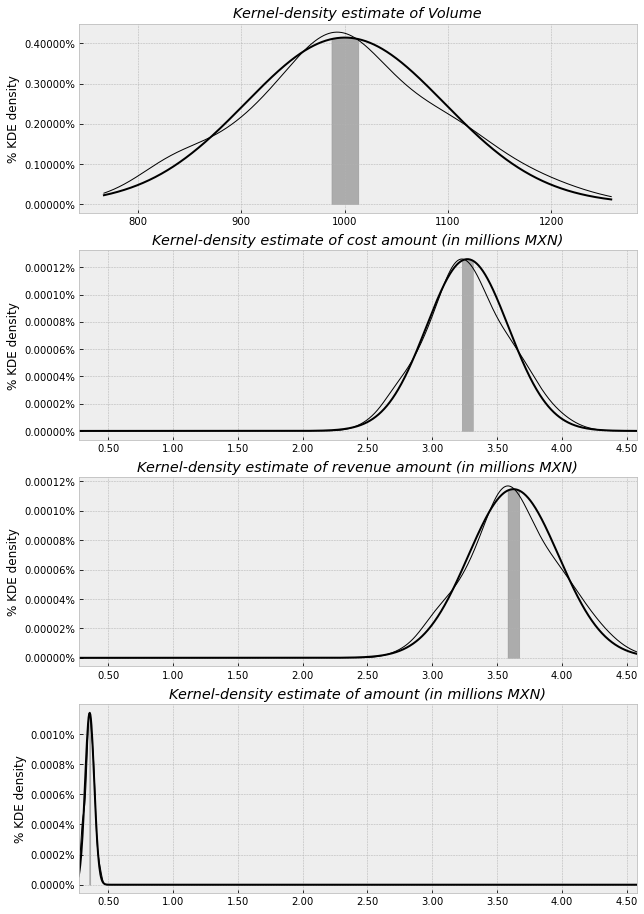

In [16]:
#Gráfico de la densidad de probabilidad
fig3 = plt.figure(figsize=(10*1, 4*4))
ax9 = plt.subplot(411)
ax9_line = np.linspace(min(totales['Volume']), max(totales['Volume']), 1000)
ax9.plot(ax9_line, st.gaussian_kde(totales['Volume']).evaluate(ax9_line),
         color='black', linewidth=1)
ax9.set_title('Kernel-density estimate of Volume', fontstyle='italic')
ax9.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(x, '.5%')))
ax9.set_ylabel('% KDE density')
ax9.plot(ax9_line, st.norm(loc=np.mean(totales['Volume']), 
                 scale=np.std(totales['Volume'])).pdf(ax9_line), color='black', 
         linewidth= 2)
ax9.fill_between(ax9_line, st.norm(loc=np.mean(totales['Volume']), 
                 scale=np.std(totales['Volume'])).pdf(ax9_line), 
                 where= (ax9_line > pieces_min) & (ax9_line < pieces_max),
                 color= 'gray', alpha= 0.6)    
ax10 = plt.subplot(412)
ax10_line = np.linspace(q_min, q_max, 1000)
ax10.plot(ax10_line,
         st.gaussian_kde(totales['Cost']).evaluate(ax10_line),
         color='black', linewidth= 1)
ax10.set_title('Kernel-density estimate of cost amount (in millions MXN)', fontstyle='italic')
ax10.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(x, '.5%')))
ax10.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(x/1000000, '.2f')))
ax10.set_ylabel('% KDE density')
ax10.set_xlim(q_min, q_max)
ax10.plot(ax10_line, st.norm(loc=np.mean(totales['Cost']), 
                 scale=np.std(totales['Cost'])).pdf(ax10_line), color='black', 
          linewidth= 2)
ax10.fill_between(ax10_line, st.norm(loc=np.mean(totales['Cost']), 
                 scale=np.std(totales['Cost'])).pdf(ax10_line), 
                 where= (ax10_line > buy_min) & (ax10_line < buy_max),
                 color= 'gray', alpha= 0.6)  
ax11 = plt.subplot(413)
ax11_line = np.linspace(q_min, q_max, 1000)
ax11.plot(ax11_line,
         st.gaussian_kde(totales['Revenue']).evaluate(ax11_line),
         color= 'black', linewidth= 1)
ax11.set_title('Kernel-density estimate of revenue amount (in millions MXN)', fontstyle='italic')
ax11.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(x, '.5%')))
ax11.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(x/1000000, '.2f')))
ax11.set_ylabel('% KDE density')
ax11.set_xlim(q_min, q_max)
ax11.plot(ax11_line, st.norm(loc=np.mean(totales['Revenue']), 
                 scale=np.std(totales['Revenue'])).pdf(ax11_line), color='black', 
          linewidth= 2)
ax11.fill_between(ax11_line, st.norm(loc=np.mean(totales['Revenue']), 
                 scale=np.std(totales['Revenue'])).pdf(ax11_line), 
                 where= (ax11_line > sell_min) & (ax11_line < sell_max),
                 color= 'gray', alpha= 0.6)  
ax12 = plt.subplot(414)
ax12_line = np.linspace(q_min, q_max, 1000)
ax12.plot(ax12_line,
         st.gaussian_kde(totales['Margin']).evaluate(ax12_line),
         color= 'black', linewidth= 1)
ax12.set_title('Kernel-density estimate of amount (in millions MXN)', fontstyle='italic')
ax12.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(x, '.4%')))
ax12.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(x/1000000, '.2f')))
ax12.set_ylabel('% KDE density')
ax12.set_xlim(q_min, q_max)
ax12.plot(ax12_line, st.norm(loc=np.mean(totales['Margin']), 
                 scale=np.std(totales['Margin'])).pdf(ax12_line), color='black', 
          linewidth= 2)
ax12.fill_between(ax12_line, st.norm(loc=np.mean(totales['Margin']), 
                 scale=np.std(totales['Margin'])).pdf(ax12_line), 
                 where= (ax12_line > margin_min) & (ax12_line < margin_max),
                 color= 'gray', alpha= 0.6)  

In [17]:
#Crear un intervalo de confianza 
st.norm.interval(alpha= 0.95, loc= np.mean(totales['Cost']), scale= st.sem(totales['Cost']))

(3227219.8136173305, 3315239.206382669)